<a href="https://colab.research.google.com/github/jimenasalinas/RedditGoesGreen/blob/main/eda/final_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Climate Project EDA

Feb 2024

In [1]:
import pandas as pd
from google.colab import drive
import numpy as np
import matplotlib.pyplot as plt
import datetime
import matplotlib.ticker as ticker
import seaborn as sns

In [2]:
drive.mount('/content/drive')

# Load data
data_path = "/content/drive/My Drive/group_project/archive/"
comments = pd.read_csv(data_path + "the-reddit-climate-change-dataset-comments.csv")
posts = pd.read_csv(data_path + "the-reddit-climate-change-dataset-posts.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## EDA for comments


## Understand the datasets

In [4]:
comments.describe(include='all')

,type,id,subreddit.id,subreddit.name,subreddit.nsfw,created_utc,permalink,body,sentiment,score
count,4600698,4600698,4600698,4600698,4600698,4.600698e+06,4600698,4600698,4.543567e+06,4.600698e+06
unique,1,4600698,30945,30889,2,NaN,4600698,4485881,NaN,NaN
top,comment,c0i14fb,2cneq,politics,False,NaN,https://old.reddit.com/r/AskReddit/comments/ak...,Climate change,NaN,NaN
freq,4600698,1,370018,370018,4585224,NaN,1,9190,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,1.560607e+09,NaN,NaN,-5.827452e-03,9.552084e+00
std,NaN,NaN,NaN,NaN,NaN,7.576261e+07,NaN,NaN,6.581439e-01,1.157160e+02
min,NaN,NaN,NaN,NaN,NaN,1.262306e+09,NaN,NaN,-1.000000e+00,-2.379000e+03
25%,NaN,NaN,NaN,NaN,NaN,1.518140e+09,NaN,NaN,-6.369000e-01,1.000000e+00
50%,NaN,NaN,NaN,NaN,NaN,1.571668e+09,NaN,NaN,0.000000e+00,2.000000e+00
75%,NaN,NaN,NaN,NaN,NaN,1.622571e+09,NaN,NaN,6.249000e-01,5.000000e+00


In [5]:
comments.head()

,type,id,subreddit.id,subreddit.name,subreddit.nsfw,created_utc,permalink,body,sentiment,score
0,comment,imlddn9,2qh3l,news,False,1661990368,https://old.reddit.com/r/news/comments/x2cszk/...,Yeah but what the above commenter is saying is...,0.5719,2
1,comment,imldbeh,2qn7b,ohio,False,1661990340,https://old.reddit.com/r/Ohio/comments/x2awnp/...,Any comparison of efficiency between solar and...,-0.9877,2
2,comment,imldado,2qhma,newzealand,False,1661990327,https://old.reddit.com/r/newzealand/comments/x...,I'm honestly waiting for climate change and th...,-0.1143,1
3,comment,imld6cb,2qi09,sacramento,False,1661990278,https://old.reddit.com/r/Sacramento/comments/x...,Not just Sacramento. It's actually happening a...,0.0000,4
4,comment,imld0kj,2qh1i,askreddit,False,1661990206,https://old.reddit.com/r/AskReddit/comments/x2...,I think climate change tends to get some peopl...,0.6634,1


In [6]:
# number of unique subreddits
comments['subreddit.id'].nunique()

30945

In [7]:
# number of unique ids
comments.id.nunique()

4600698

In [8]:
# only comments are available which makes sense
comments['type'].nunique()

1

In [9]:
# no NAs in body text- good for our purposes
comments.body.isna().sum()

0

In [3]:
# Removing columns we don't need
columns_to_drop = ['type', 'subreddit.id', 'subreddit.nsfw', 'permalink']

# Dropping columns
comments.drop(columns_to_drop, axis=1, inplace=True)

# converting to datetime
comments['created_utc'] = pd.to_datetime(comments['created_utc'], unit='s')

In [11]:
comments.head()

,id,subreddit.name,created_utc,body,sentiment,score
0,imlddn9,news,2022-08-31 23:59:28,Yeah but what the above commenter is saying is...,0.5719,2
1,imldbeh,ohio,2022-08-31 23:59:00,Any comparison of efficiency between solar and...,-0.9877,2
2,imldado,newzealand,2022-08-31 23:58:47,I'm honestly waiting for climate change and th...,-0.1143,1
3,imld6cb,sacramento,2022-08-31 23:57:58,Not just Sacramento. It's actually happening a...,0.0000,4
4,imld0kj,askreddit,2022-08-31 23:56:46,I think climate change tends to get some peopl...,0.6634,1


## Cleaning body column

Removing URLs, punctuation and special characters in each comment and converting them all to lowercase.

In [4]:
# Clean the text
import re
def clean_text(text):
    # Removing URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation and special characters
    text = re.sub(r'[\.\,\'\"\!\?\:\;\-\_]', '', text)
    return text

comments['body'] = comments['body'].apply(clean_text)
comments


,id,subreddit.name,created_utc,body,sentiment,score
0,imlddn9,news,2022-08-31 23:59:28,yeah but what the above commenter is saying is...,0.5719,2
1,imldbeh,ohio,2022-08-31 23:59:00,any comparison of efficiency between solar and...,-0.9877,2
2,imldado,newzealand,2022-08-31 23:58:47,im honestly waiting for climate change and the...,-0.1143,1
3,imld6cb,sacramento,2022-08-31 23:57:58,not just sacramento its actually happening all...,0.0000,4
4,imld0kj,askreddit,2022-08-31 23:56:46,i think climate change tends to get some peopl...,0.6634,1
...,...,...,...,...,...,...
4600693,c0i1pd9,politics,2010-01-01 12:37:36,&gt we have no history ours goes back only 40...,-0.9849,32
4600694,c0i1hsb,askreddit,2010-01-01 07:05:41,changing the oil *filter* every single time yo...,0.7579,3
4600695,c0i1a0w,environment,2010-01-01 02:54:40,a man who though a moderate tory has a mixed ...,0.0242,1
4600696,c0i195b,worldnews,2010-01-01 02:30:18,both iggy and harper would have marched us int...,0.4754,0


## Plotting most frequent words
avoid this keeps crashing

In [ ]:
# from wordcloud import WordCloud

# # Combine all comments into a single string
# all_comments = ' '.join(comments['body'].tolist())

# # Create a basic WordCloud without removing stopwords or other NLP preprocessing
# basic_wordcloud = WordCloud(width = 800, height = 800,
#                             background_color ='white', min_font_size = 10).generate(all_comments)

# # Plotting the basic WordCloud
# plt.figure(figsize = (8, 8), facecolor = None)
# plt.imshow(basic_wordcloud)
# plt.axis("off")
# plt.tight_layout(pad = 0)

# plt.show()

# to- do: session kept crashing- stop words, tokenize


### counting different subreddits
Activity in each subreddit

In [13]:
def count_categories(categories):
    category_counts = {}
    for category in categories:
        if category in category_counts:
            category_counts[category] += 1
        else:
            category_counts[category] = 1

    return list(category_counts.items())

subreddits = count_categories(comments['subreddit.name'])

In [14]:
subreddits

[('news', 94558),
 ('ohio', 891),
 ('newzealand', 18213),
 ('sacramento', 1161),
 ('askreddit', 259848),
 ('walkaway', 1925),
 ('pastors', 3),
 ('hudsonvalley', 23),
 ('futurology', 89945),
 ('progressive_islam', 83),
 ('collapseprep', 83),
 ('terriblefacebookmemes', 1167),
 ('socialdemocracy', 1112),
 ('portland', 5749),
 ('effectivealtruism', 621),
 ('worldnews', 351195),
 ('changemyview', 42902),
 ('tuesday', 2197),
 ('damnthatsinteresting', 8174),
 ('conspiracy', 50951),
 ('conspiracy_commons', 2252),
 ('terrifyingasfuck', 421),
 ('maine', 974),
 ('askthe_donald', 5785),
 ('civicx', 4),
 ('askwomenover30', 789),
 ('suggestmeabook', 1488),
 ('climate', 24146),
 ('urbanplanning', 1948),
 ('space', 13302),
 ('anarcho_capitalism', 6559),
 ('politicalcompassmemes', 20305),
 ('the_wild_hunt_news', 38),
 ('environment', 70444),
 ('antinatalism', 4865),
 ('asroma', 3),
 ('technology', 24145),
 ('toronto', 4069),
 ('grandrapids', 303),
 ('interestingasfuck', 17063),
 ('politics', 370018),
 

In [48]:
#Dropping subreddits that have less than "threshold" posts- doing 3000 for now
sorted_subreddits = sorted(subreddits, key=lambda x: x[1], reverse=True)

def drop_tuples_below_threshold(tuples_list, threshold):
    return [t for t in tuples_list if t[1] >= threshold]

sorted_subreddits_3000 = drop_tuples_below_threshold(sorted_subreddits, 5000)
print(sorted_subreddits_3000)

[('politics', 370018), ('worldnews', 351195), ('askreddit', 259848), ('collapse', 94696), ('news', 94558), ('futurology', 89945), ('science', 71453), ('environment', 70444), ('canada', 66813), ('australia', 60239), ('conspiracy', 50951), ('unpopularopinion', 49178), ('climateskeptics', 46524), ('ukpolitics', 43179), ('changemyview', 42902), ('neoliberal', 42268), ('pics', 42233), ('europe', 37331), ('the_donald', 34106), ('canadapolitics', 31399), ('todayilearned', 30651), ('unitedkingdom', 28282), ('politicalhumor', 28203), ('bottown2', 27435), ('videos', 26813), ('politicaldiscussion', 24534), ('climate', 24146), ('technology', 24145), ('conservative', 23690), ('climatechange', 22358), ('libertarian', 21975), ('sandersforpresident', 20722), ('dataisbeautiful', 20533), ('politicalcompassmemes', 20305), ('atheism', 19640), ('australianpolitics', 19346), ('asktrumpsupporters', 18994), ('nostupidquestions', 18600), ('memes', 18217), ('newzealand', 18213), ('whitepeopletwitter', 17960), (

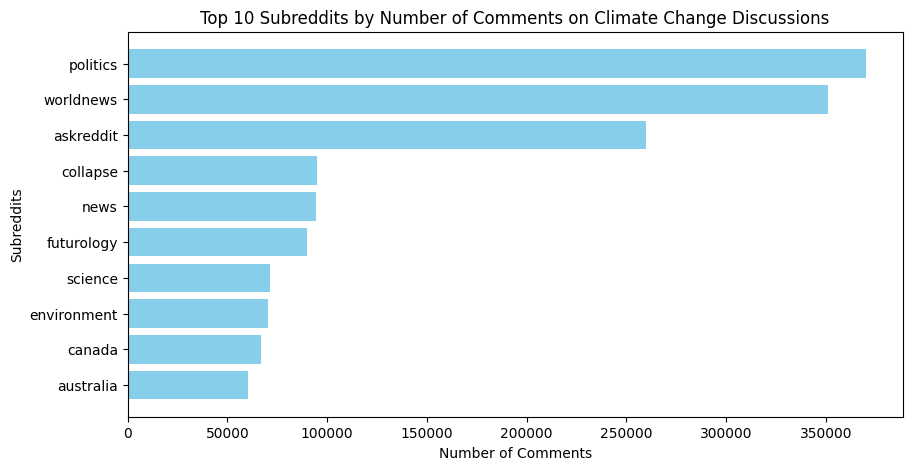

In [57]:
sorted_subreddits_10 = sorted(sorted_subreddits_3000, key=lambda x: x[1], reverse=True)[:10]

# Extracting subreddits and their corresponding number of comments for the top 100
top_subreddits = [item[0] for item in sorted_subreddits_10]
top_comments = [item[1] for item in sorted_subreddits_10]

# Plotting the data for the top 100 subreddits
plt.figure(figsize=(10, 5))
plt.barh(top_subreddits, top_comments, color='skyblue')
plt.xlabel('Number of Comments')
plt.ylabel('Subreddits')
plt.title('Top 10 Subreddits by Number of Comments on Climate Change Discussions')
plt.gca().invert_yaxis()  # To display the highest value at the top
plt.show()

### No of comments per year and year-month

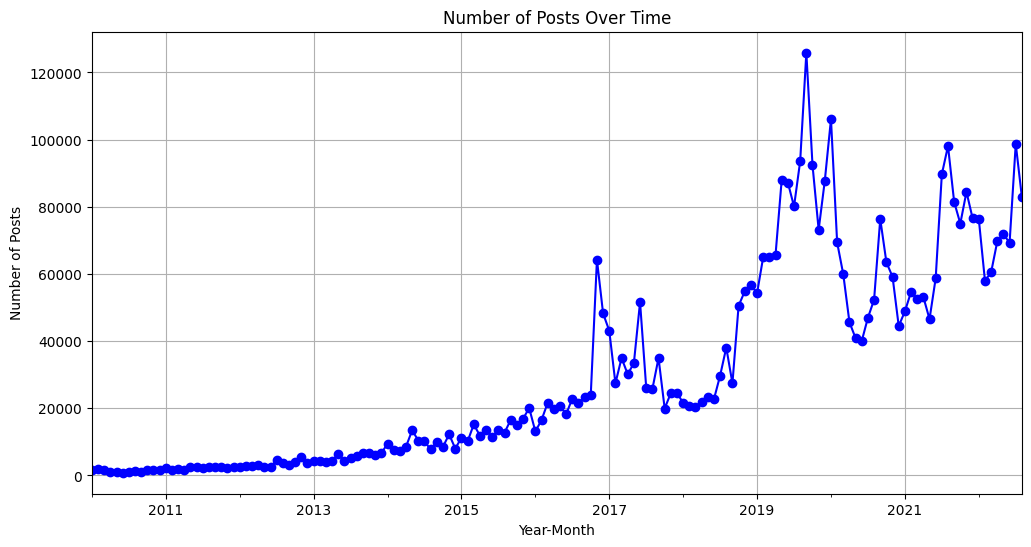

In [5]:
# Extract year and month from the 'created_utc' column
comments['year_month'] = comments['created_utc'].dt.to_period('M')

# Count the number of posts per year-month
posts_per_year_month = comments.groupby('year_month').size()

# Plotting the number of posts over time
plt.figure(figsize=(12, 6))
posts_per_year_month.plot(kind='line', marker='o', color='b')
plt.title('Number of Posts Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Number of Posts')
plt.grid(True)
plt.show()

In [20]:
# Year-Month
# Define date
comments['date'] = pd.to_datetime(comments['created_utc'], unit='s')
comments['year_month'] = comments['date'].dt.to_period('M')
comments['year'] = comments['date'].dt.to_period('Y')


In [42]:
num_obs_year_month = comments.groupby('year_month').agg({'body':'count'}).reset_index().rename(columns={'body':'cnt'})
num_obs_year = comments.groupby('year').agg({'body':'count'}).reset_index().rename(columns={'body':'cnt'})

In [43]:
num_obs_year_month.describe()

,cnt
count,152.000000
mean,30267.750000
std,29987.929909
min,825.000000
25%,4444.250000
50%,20023.500000
75%,52794.000000
max,125877.000000


In [44]:
num_obs_year.describe()

,cnt
count,13.000000
mean,353899.846154
std,326894.727886
min,16282.000000
25%,65170.000000
50%,314517.000000
75%,587174.000000
max,978413.000000


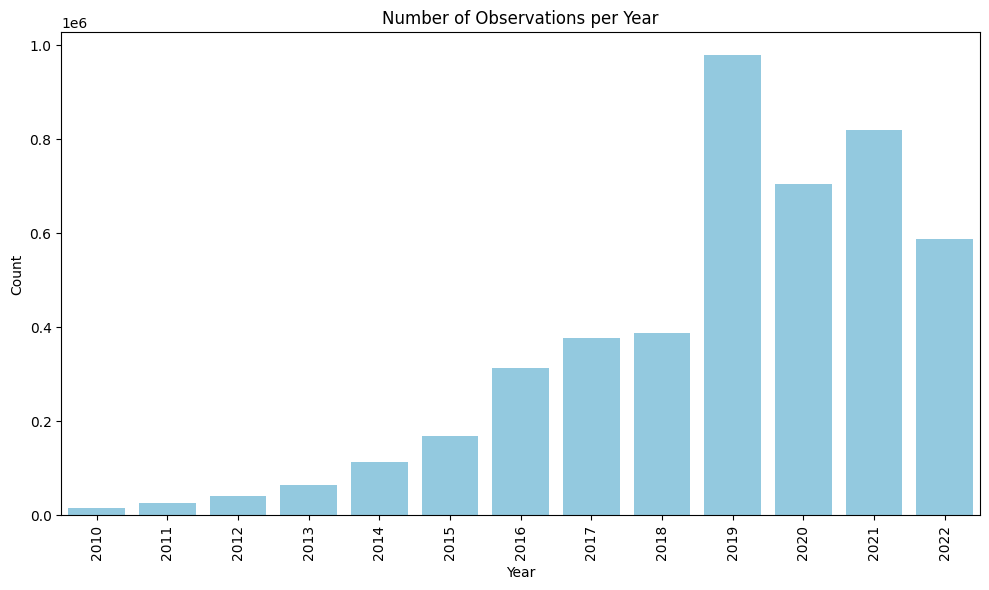

In [45]:
# Create the plot for year
plt.figure(figsize=(10, 6))
sns.barplot(data=num_obs_year, x='year', y='cnt', color='skyblue') # Adjust the frequency of x-axis labels to show only a subset
plt.xticks(rotation=90) # Rotate the x-axis labels for better readability
ax = plt.gca() # Get current axis
ax.xaxis.set_major_locator(ticker.MultipleLocator(1)) # Show a X number of intervals
#Customize
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Number of Observations per Year')
plt.tight_layout() # Adjust layout to make room for the rotated x-axis labels
plt.show()

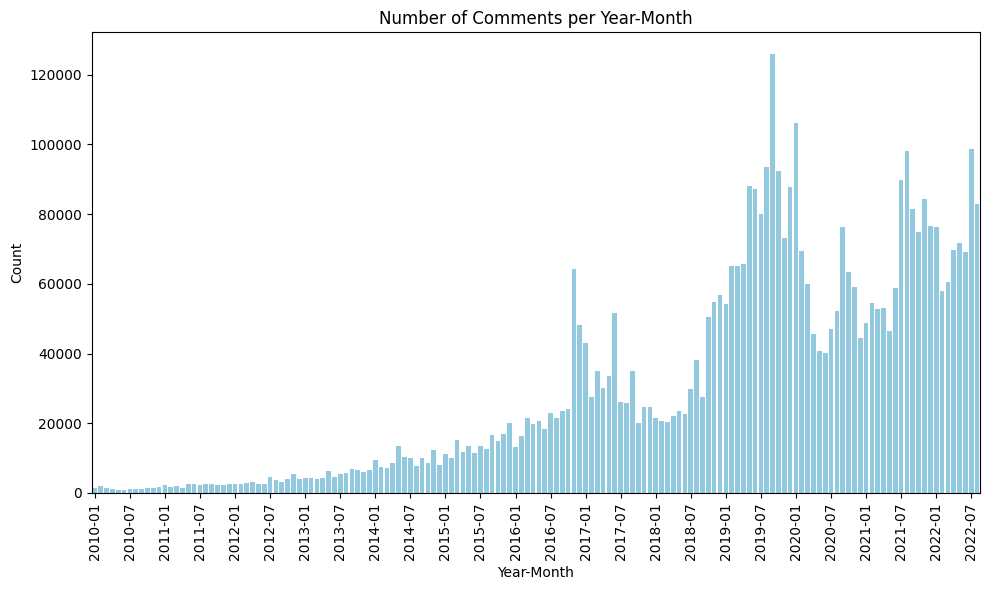

In [46]:
# Create the plot for year_month
num_obs_year_month['year_month'] = num_obs_year_month['year_month'].astype(str)
plt.figure(figsize=(10, 6))
sns.barplot(data=num_obs_year_month, x='year_month', y='cnt', color='skyblue') # Adjust the frequency of x-axis labels to show only a subset
plt.xticks(rotation=90) # Rotate the x-axis labels for better readability
ax = plt.gca() # Get current axis
ax.xaxis.set_major_locator(ticker.MultipleLocator(6)) # Show a X number of intervals
#Customize
plt.xlabel('Year-Month')
plt.ylabel('Count')
plt.title('Number of Comments per Year-Month')
plt.tight_layout() # Adjust layout to make room for the rotated x-axis labels
plt.show()

## length of each comment

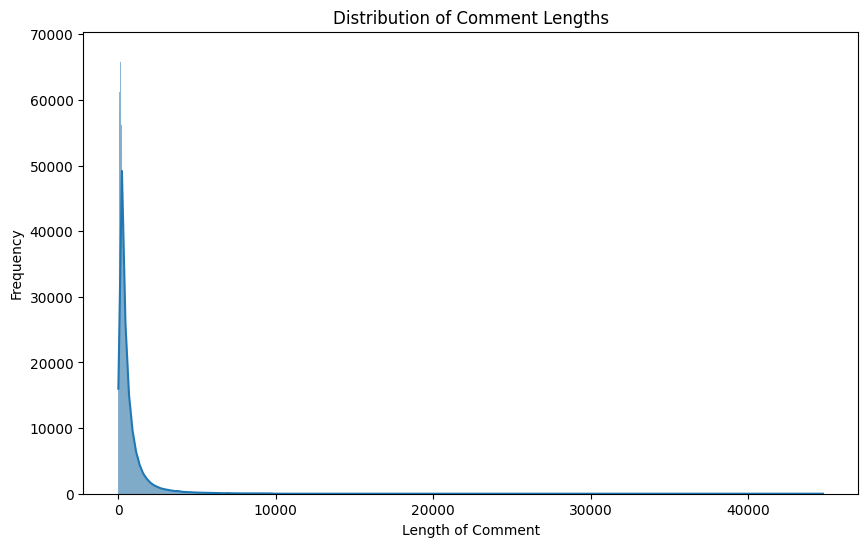

count    4.600698e+06
mean     6.749489e+02
std      9.694748e+02
min      0.000000e+00
25%      1.720000e+02
50%      3.620000e+02
75%      7.720000e+02
max      4.476700e+04
Name: comment_length, dtype: float64

In [9]:
# Calculate the length of each comment
comments['comment_length'] = comments['body'].apply(len)

# Plotting the distribution of comment lengths
plt.figure(figsize=(10, 6))
sns.histplot(comments['comment_length'], kde=True)
plt.title('Distribution of Comment Lengths')
plt.xlabel('Length of Comment')
plt.ylabel('Frequency')
plt.show()

# Descriptive statistics for comment lengths
comments['comment_length'].describe()

In [25]:
cnt_subreddits = comments.groupby(['subreddit.name']).agg({'body':'count'}).reset_index().rename(columns={'body':'cnt'}).sort_values('cnt', ascending=False)
cnt_subreddits['share_cnt'] = cnt_subreddits['cnt'] / cnt_subreddits['cnt'].sum()
cnt_subreddits.head(100)['share_cnt'].sum()

0.6624123122187112

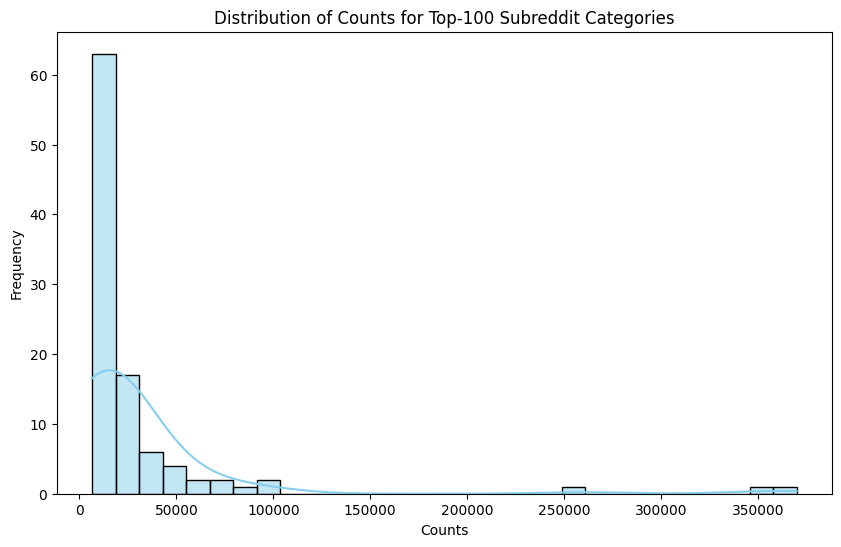

In [58]:
# Plot the histogram of top 100 subreddits
plt.figure(figsize=(10, 6)) # Adjust figure size as needed
sns.histplot(data=cnt_subreddits.head(100), x='cnt', bins=30, kde=True, color='skyblue')
plt.xlabel('Counts')
plt.ylabel('Frequency')
plt.title('Distribution of Counts for Top-100 Subreddit Categories')
plt.show()


## Posts

In [27]:
posts.describe(include='all')

,type,id,subreddit.id,subreddit.name,subreddit.nsfw,created_utc,permalink,domain,url,selftext,title,score
count,620908,620908,620908,620908,620908,6.209080e+05,620908,620908,453760,167148,620908,620908.000000
unique,1,620908,23264,23203,2,NaN,620908,28707,266619,40213,416654,NaN
top,post,ake6l,3ib5n,ecointernet,False,NaN,https://old.reddit.com/r/AskReddit/comments/ak...,self.talkativepeople,https://worldenvironment11.blogspot.com/2021/0...,[removed],Climate Change,NaN
freq,620908,1,39994,39994,616962,NaN,1,30993,741,71799,763,NaN
mean,NaN,NaN,NaN,NaN,NaN,1.540695e+09,NaN,NaN,NaN,NaN,NaN,81.868678
std,NaN,NaN,NaN,NaN,NaN,7.738068e+07,NaN,NaN,NaN,NaN,NaN,1411.423764
min,NaN,NaN,NaN,NaN,NaN,1.262305e+09,NaN,NaN,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,NaN,1.497725e+09,NaN,NaN,NaN,NaN,NaN,1.000000
50%,NaN,NaN,NaN,NaN,NaN,1.557750e+09,NaN,NaN,NaN,NaN,NaN,1.000000
75%,NaN,NaN,NaN,NaN,NaN,1.588650e+09,NaN,NaN,NaN,NaN,NaN,5.000000


In [28]:
posts.head()

,type,id,subreddit.id,subreddit.name,subreddit.nsfw,created_utc,permalink,domain,url,selftext,title,score
0,post,x2smmw,2vh0v,democraticsocialism,False,1661990237,https://old.reddit.com/r/DemocraticSocialism/c...,twitter.com,https://twitter.com/SusanofTexas/status/156480...,NaN,“Cities without water” is our future. The lead...,15
1,post,x2slxy,2w844,nostupidquestions,False,1661990182,https://old.reddit.com/r/NoStupidQuestions/com...,self.nostupidquestions,NaN,Ok so I was having a conversation with my neig...,Sharks and climate change,2
2,post,x2slk5,6wzx9b,eduwriters,False,1661990150,https://old.reddit.com/r/EduWriters/comments/x...,eduwriters.pro,https://eduwriters.pro/?cid=2860/?utm_source=r...,NaN,How to start a climate change essay,1
3,post,x2sbz6,46adh7,alternatitvereality,False,1661989389,https://old.reddit.com/r/AlternatitveReality/c...,i.imgur.com,https://i.imgur.com/wJbchkQ.jpg,NaN,Ever notice that when it’s hot a few days in J...,1
4,post,x2sa2a,2qh1i,askreddit,False,1661989240,https://old.reddit.com/r/AskReddit/comments/x2...,self.askreddit,NaN,[deleted],How would you react if the next American presi...,1


In [29]:
# Removing columns we don't need
columns_to_drop = ['type', 'subreddit.id', 'subreddit.nsfw', 'permalink', 'domain','url','score']

# Dropping columns
posts.drop(columns_to_drop, axis=1, inplace=True)

# converting to datetime
posts['created_utc'] = pd.to_datetime(posts['created_utc'], unit='s')

In [30]:
posts.shape

(620908, 5)

In [31]:
# high proportion of posts have no self text
posts.selftext.isna().sum()

453760

In [32]:
# all posts have a title- so better to focus on that
posts.title.isna().sum()

0

In [33]:
#cleaning text of title
posts['title'] = posts['title'].apply(clean_text)
posts


,id,subreddit.name,created_utc,selftext,title
0,x2smmw,democraticsocialism,2022-08-31 23:57:17,NaN,“cities without water” is our future the leade...
1,x2slxy,nostupidquestions,2022-08-31 23:56:22,Ok so I was having a conversation with my neig...,sharks and climate change
2,x2slk5,eduwriters,2022-08-31 23:55:50,NaN,how to start a climate change essay
3,x2sbz6,alternatitvereality,2022-08-31 23:43:09,NaN,ever notice that when it’s hot a few days in j...
4,x2sa2a,askreddit,2022-08-31 23:40:40,[deleted],how would you react if the next american presi...
...,...,...,...,...,...
620903,aki85,environment,2010-01-01 12:50:33,NaN,climate change five easy new year’s resolutions
620904,akgtp,climateskeptics,2010-01-01 08:11:35,NaN,2009 climate change story of the year climate...
620905,akgkb,climateskeptics,2010-01-01 07:26:17,NaN,statistics scientific consensus on climate change
620906,akgbz,climateskeptics,2010-01-01 06:52:33,NaN,ultimate irony snowstorm squelches “screaming”...


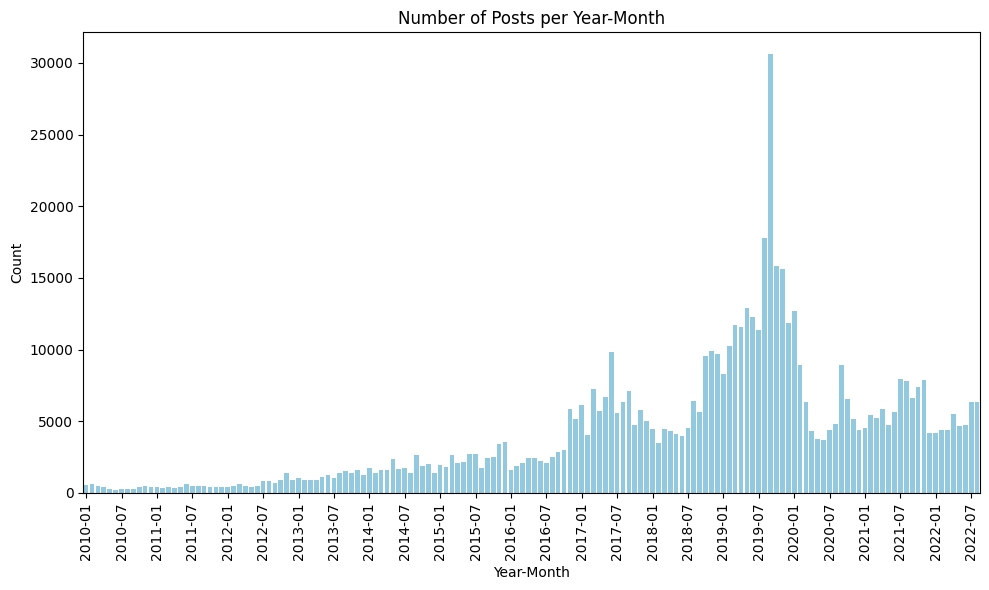

In [39]:
# Year-Month
# Define date
posts['date'] = pd.to_datetime(posts['created_utc'], unit='s')
posts['year_month'] = posts['date'].dt.to_period('M')
posts['year'] = posts['date'].dt.to_period('Y')

num_obs_year_month = posts.groupby('year_month').agg({'title':'count'}).reset_index().rename(columns={'title':'cnt'})
num_obs_year = posts.groupby('year').agg({'title':'count'}).reset_index().rename(columns={'title':'cnt'})

# Create the plot for year_month
num_obs_year_month['year_month'] = num_obs_year_month['year_month'].astype(str)
plt.figure(figsize=(10, 6))
sns.barplot(data=num_obs_year_month, x='year_month', y='cnt', color='skyblue') # Adjust the frequency of x-axis labels to show only a subset
plt.xticks(rotation=90) # Rotate the x-axis labels for better readability
ax = plt.gca() # Get current axis
ax.xaxis.set_major_locator(ticker.MultipleLocator(6)) # Show a X number of intervals
#Customize
plt.xlabel('Year-Month')
plt.ylabel('Count')
plt.title('Number of Posts per Year-Month')
plt.tight_layout() # Adjust layout to make room for the rotated x-axis labels
plt.show()

In [34]:
# !pip install  wordcloud

In [ ]:
# # Identifying key themes

# from wordcloud import WordCloud
# from datetime import datetime

# # Convert 'created_utc' to date
# posts['created_date'] = pd.to_datetime(posts['created_utc'], unit='s')


# posts['year'] = posts['created_date'].dt.year


# posts['text_data'] = posts['selftext'].fillna('') + ' ' + posts['title'].fillna('')

# # Create a word cloud for every year
# def generate_word_cloud(year):
#     text_for_year = " ".join(posts[posts['year'] == year]['text_data'])

#     wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_for_year)

#     plt.figure(figsize=(10, 5))
#     plt.imshow(wordcloud, interpolation='bilinear')
#     plt.title(f"Word Cloud for {year}")
#     plt.axis('off')
#     plt.show()


# unique_years = posts['year'].unique()
# for year in unique_years:
#     generate_word_cloud(year)

## Provided Sentiment Analysis

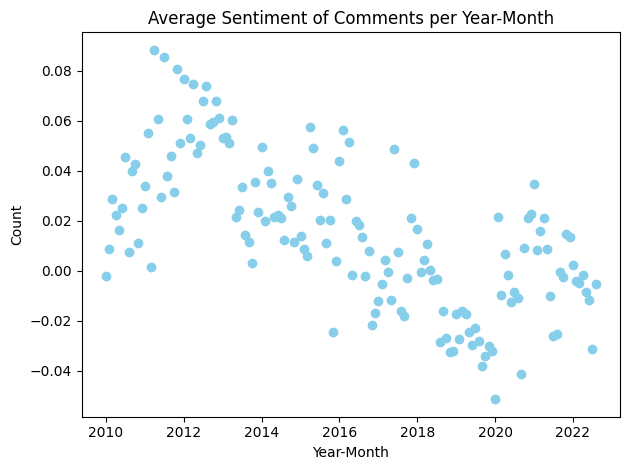

In [61]:
# Average sentiment per year
yearly_sentiments = comments.groupby(pd.PeriodIndex(comments['year_month']))['sentiment'].mean()
plt.scatter(yearly_sentiments.index.to_timestamp(),yearly_sentiments,color="skyblue")
plt.xlabel('Year-Month')
plt.ylabel('Count')
plt.title('Average Sentiment of Comments per Year-Month')
plt.tight_layout() # Adjust layout to make room for the rotated x-axis labels
plt.show()

In [ ]:
def create_label(sentiment):
    if sentiment < -0.05:
        return -1
    elif sentiment >= -0.05 and sentiment <= 0.05:
        return 0
    else:
        return 1

In [ ]:
comments['label'] = comments['sentiment'].apply(create_label)

In [8]:
comments.head()

,id,subreddit.name,created_utc,body,sentiment,score,year_month
0,imlddn9,news,2022-08-31 23:59:28,yeah but what the above commenter is saying is...,0.5719,2,2022-08
1,imldbeh,ohio,2022-08-31 23:59:00,any comparison of efficiency between solar and...,-0.9877,2,2022-08
2,imldado,newzealand,2022-08-31 23:58:47,im honestly waiting for climate change and the...,-0.1143,1,2022-08
3,imld6cb,sacramento,2022-08-31 23:57:58,not just sacramento its actually happening all...,0.0000,4,2022-08
4,imld0kj,askreddit,2022-08-31 23:56:46,i think climate change tends to get some peopl...,0.6634,1,2022-08


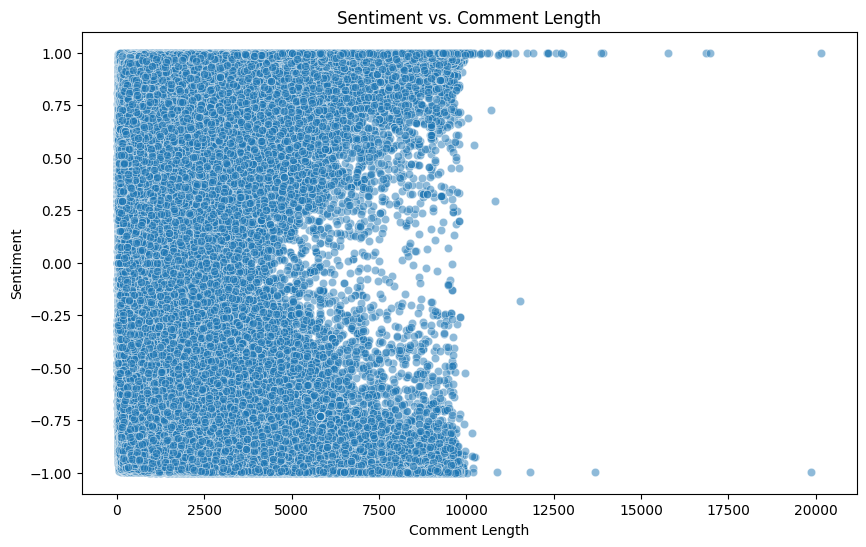

Correlation coefficient between sentiment and comment length:
                sentiment  comment_length
sentiment        1.000000        0.082666
comment_length   0.082666        1.000000


In [11]:
# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=comments, x='comment_length', y='sentiment', alpha=0.5)
plt.title('Sentiment vs. Comment Length')
plt.xlabel('Comment Length')
plt.ylabel('Sentiment')
plt.show()

# Correlation analysis
correlation_matrix = comments[['sentiment', 'comment_length']].corr()
print("Correlation coefficient between sentiment and comment length:")
print(correlation_matrix)

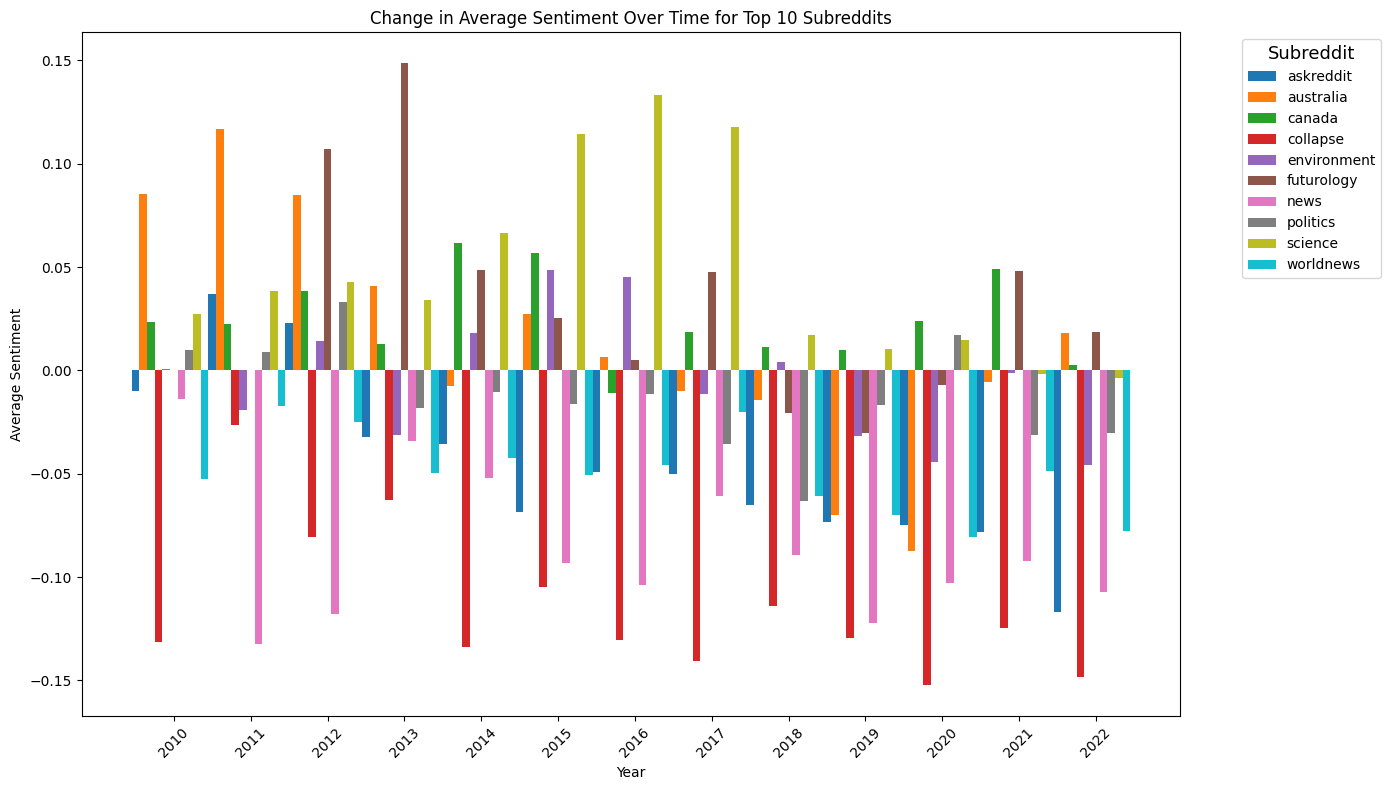

In [21]:
# Identify the top 10 subreddits by activity
top_subreddits = comments['subreddit.name'].value_counts().head(10).index

# Filter the DataFrame to include only the top 10 subreddits
filtered_comments = comments[comments['subreddit.name'].isin(top_subreddits)]

# Calculate the average sentiment for each subreddit by year_month
avg_sentiment_time = filtered_comments.groupby(['subreddit.name', 'year'])['sentiment'].mean().reset_index()

# Pivot the DataFrame for plotting
pivot_comments = avg_sentiment_time.pivot(index='year', columns='subreddit.name', values='sentiment')

# Plotting
fig, ax = plt.subplots(figsize=(14, 8))

# Width of a bar
bar_width = 0.1

# Positions of the bars on the x-axis
indices = np.arange(len(pivot_comments))

# Iterate over the columns (subreddits) to plot
for i, subreddit in enumerate(pivot_comments.columns):
    # Calculate position for each subreddit
    pos = indices - (len(pivot_comments.columns)/2 - i) * bar_width
    ax.bar(pos, pivot_comments[subreddit], width=bar_width, label=subreddit)

plt.title('Change in Average Sentiment Over Time for Top 10 Subreddits')
plt.xlabel('Year')
plt.ylabel('Average Sentiment')
plt.xticks(indices, pivot_comments.index, rotation=45)
plt.legend(title='Subreddit', title_fontsize='13', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()